<a href="https://colab.research.google.com/github/20wh1a05d0/fmml20220063/blob/main/FMML20220063_Aug22_M1Lab2_DataFeatures%26Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FMML Module 1, Lab 2<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data


 



In [ ]:
## Standard Imports.

! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## What are features? 
### Features are individual independent variables that act like an input to your system. 
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

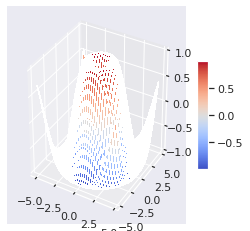

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data

 
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(1))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25) # feature 1
Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.4, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# Part 2: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features.They are converted into vectors (embeddings) or one hot encoded.  Let us explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [ ]:
## set language and then download the data.

topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [ ]:
fr2 ## the french textual data describing the second topic.

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters, i.e. if not a-z then replace with space.
  return text

In [ ]:
text1 = re.sub('[a-z]', '1', 'espèce d\'« éléphant d\?Afrique »,')
text1

"111è11 1'« é1é11111 1\\?A111111 »,"

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Instead of directly using characters as the features, to understand a text better, we may consider group of tokens i.e. ngrams as features.
 
For this example let us consider that each character is one word, and let us see how n-grams work.


## nltk library provides many tools for text processing, please explore them.

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
## Dont worry if you do not understand these functions right away, you can revisit them and follow step-by-step.

# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
  zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

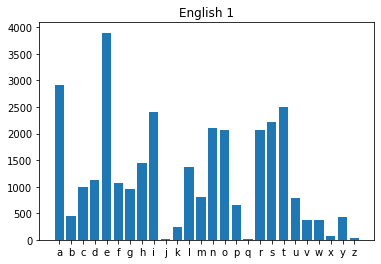

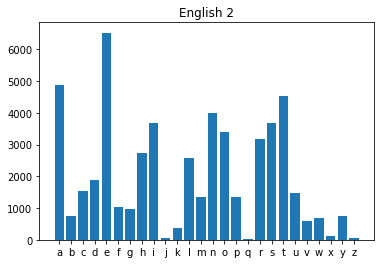

In [ ]:
## we passed ngrams 'n' as 1 to get unigrams. Unigram is nothing but single token (in this case character).
## ngrams imported from nltk, it returns ngrams from given string. Counter returns dictionary with keys as elements and counts as values.
unigram_eng1 = Counter(ngrams(eng1,1)) ##just to get count of each element. 
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

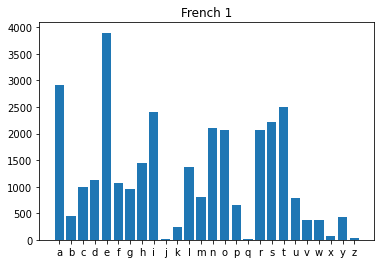

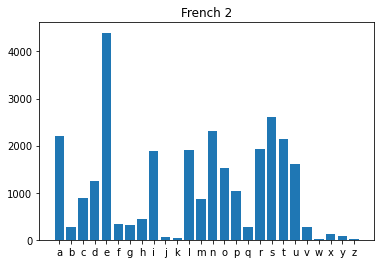

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

## A good feature is one that helps in easy prediction and classification. 
## for ex : if you wish to differentiate between grapes and apples, size can be one of the useful features.

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

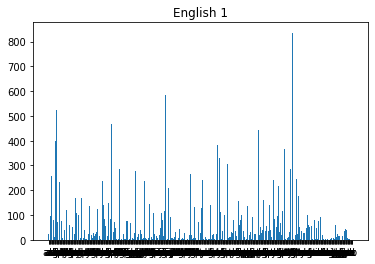

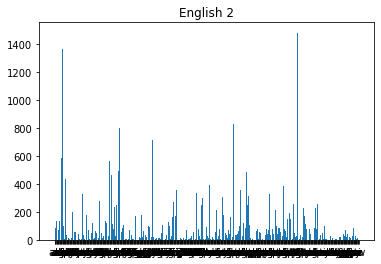

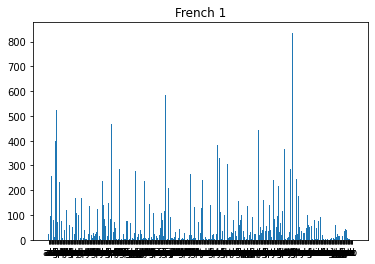

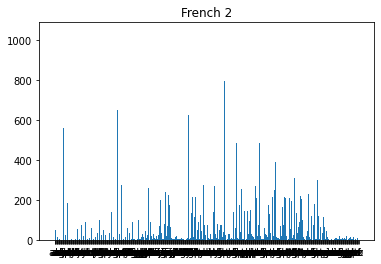

In [ ]:
## Now instead of unigram, we will use bigrams as features, and see how useful bigrams are as features.

bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
## lets have a lot at bigrams.

bigram_eng1


Counter({('t', 'h'): 836,
         ('h', 'e'): 694,
         ('e', 'g'): 164,
         ('g', 'i'): 279,
         ('i', 'r'): 315,
         ('r', 'a'): 442,
         ('a', 'f'): 258,
         ('f', 'f'): 262,
         ('f', 'e'): 286,
         ('e', 'i'): 145,
         ('i', 's'): 211,
         ('s', 'a'): 240,
         ('a', 'l'): 398,
         ('l', 'a'): 181,
         ('a', 'r'): 323,
         ('r', 'g'): 39,
         ('g', 'e'): 151,
         ('e', 'a'): 347,
         ('f', 'r'): 77,
         ('r', 'i'): 159,
         ('i', 'c'): 162,
         ('c', 'a'): 168,
         ('a', 'n'): 524,
         ('n', 'h'): 25,
         ('h', 'o'): 110,
         ('o', 'o'): 58,
         ('o', 'f'): 194,
         ('e', 'd'): 280,
         ('d', 'm'): 35,
         ('m', 'a'): 242,
         ('a', 'm'): 77,
         ('m', 'm'): 29,
         ('l', 'b'): 11,
         ('b', 'e'): 121,
         ('e', 'l'): 155,
         ('l', 'o'): 147,
         ('o', 'n'): 367,
         ('n', 'g'): 329,
         ('i', 'n'):

In [ ]:
## a function to plot 2-D histogram. The values are color mapped. 

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] #ord converts char to code
  plt.imshow(freq, cmap = 'jet')
  plt.colorbar()
  return freq

In [ ]:
ord

<function ord(c, /)>

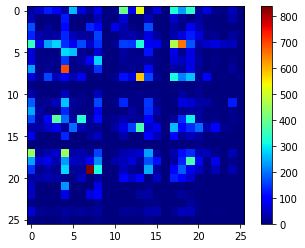

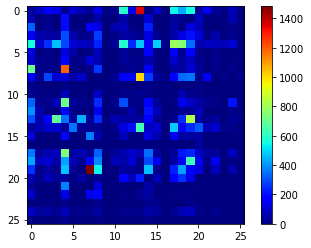

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

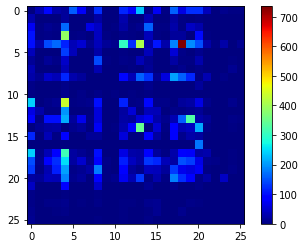

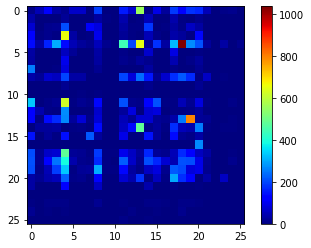

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 836.0
('h', 'e') : 694.0
('e', 's') : 658.0
('i', 'n') : 585.0
('a', 'n') : 524.0
('e', 'r') : 467.0
('r', 'e') : 450.0
('r', 'a') : 442.0
('a', 'l') : 398.0
('n', 'd') : 384.0

English 2:
('t', 'h') : 1482.0
('a', 'n') : 1366.0
('h', 'e') : 1194.0
('i', 'n') : 1013.0
('n', 't') : 828.0
('e', 'r') : 803.0
('e', 's') : 759.0
('r', 'e') : 755.0
('l', 'e') : 720.0
('h', 'a') : 715.0

French 1:
('e', 's') : 735.0
('l', 'e') : 437.0
('e', 'n') : 410.0
('d', 'e') : 388.0
('o', 'n') : 349.0
('n', 't') : 328.0
('r', 'e') : 314.0
('e', 'l') : 302.0
('s', 'e') : 254.0
('l', 'a') : 244.0

French 2:
('e', 's') : 1036.0
('n', 't') : 795.0
('d', 'e') : 657.0
('e', 'n') : 650.0
('l', 'e') : 625.0
('a', 'n') : 557.0
('r', 'e') : 485.0
('o', 'n') : 484.0
('e', 'l') : 442.0
('s', 'e') : 390.0


## At times, we need to reduce the number of features. We will discuss this more in the upcoming sessions, but a small example has been discussed here. Instead of using each unique token (a word) as a feature, we reduced the number of features by using 1-gram and 2-gram of characters as features.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [ ]:
#1.For different languages

In [ ]:
#Setting the data
topic1 = 'Nelumbo nucifera'
topic2 = 'Helianthus'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('de')
de1 = wikipedia.page(topic1).content
de2 = wikipedia.page(topic2).content

In [ ]:
#Removing all characters except (a-z)
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
de1 = cleanup(de1)
de2 = cleanup(de2)

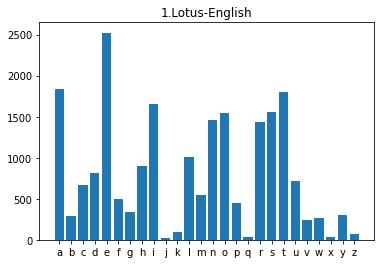

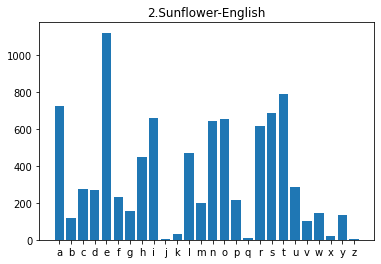

In [ ]:
#Counting the occurrence of a character in English
eng1_unigram = Counter(ngrams(eng1,1))
plothistogram(eng1_unigram)
plt.title('1.Lotus-English')
plt.show()
eng2_unigram = Counter(ngrams(eng2,1))
plothistogram(eng2_unigram)
plt.title('2.Sunflower-English')
plt.show()


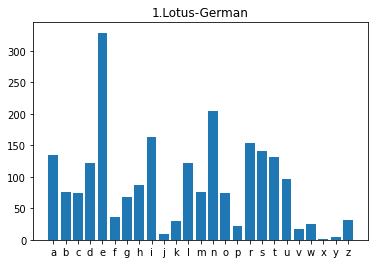

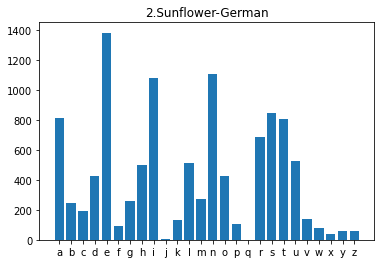

In [ ]:
#Counting the occurrence of a character in German
de1_unigram = Counter(ngrams(de1,1))
plothistogram(de1_unigram)
plt.title('1.Lotus-German')
plt.show()
de2_unigram = Counter(ngrams(de2,1))
plothistogram(de2_unigram)
plt.title('2.Sunflower-German')
plt.show()

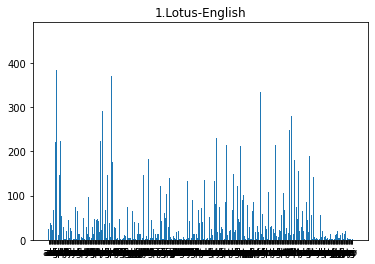

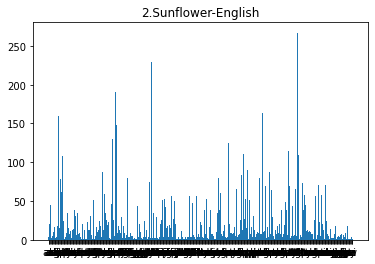

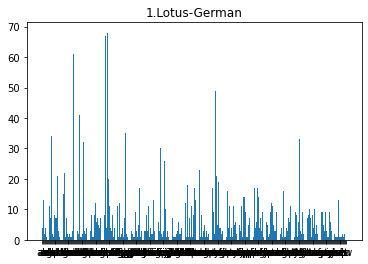

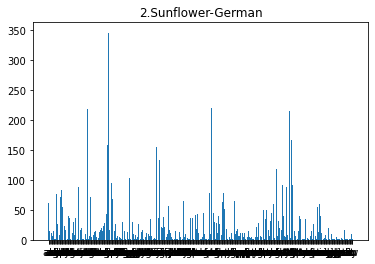

In [ ]:
#To plot histogram for bigram 
eng1_bigram = Counter(ngrams(eng1,2)) # bigrams
plothistogram(eng1_bigram)
plt.title('1.Lotus-English')
plt.show()

eng2_bigram = Counter(ngrams(eng2,2))
plothistogram(eng2_bigram)
plt.title('2.Sunflower-English')
plt.show()

de1_bigram = Counter(ngrams(de1,2))
plothistogram(de1_bigram)
plt.title('1.Lotus-German')
plt.show()

de2_bigram = Counter(ngrams(de2,2))
plothistogram(de2_bigram)
plt.title('2.Sunflower-German')
plt.show()

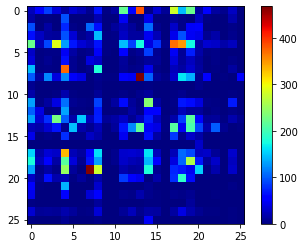

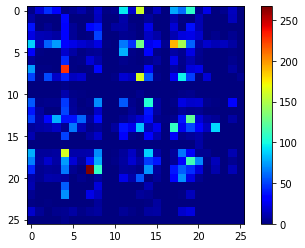

In [ ]:
#Representing bigram in 2D - English
bi_eng1 = plotbihistogram(eng1_bigram)
plt.show()
bi_eng2 = plotbihistogram(eng2_bigram)

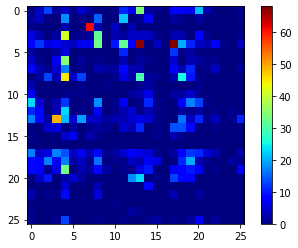

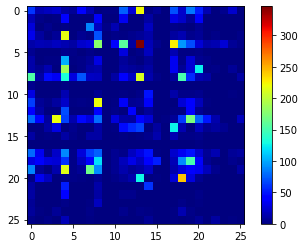

In [ ]:
#Representing bigram in 2D - German
bi_de1 = plotbihistogram(de1_bigram)
plt.show()
bi_de2 = plotbihistogram(de2_bigram)

In [ ]:
print('\n1.Lotus-English:')
ShowTopN(bi_eng1)
print('\n2.Sunflower-English:')
ShowTopN(bi_eng2)
print('\n1.Lotus-German:')
ShowTopN(bi_de1)
print('\n2.Sunflower-German:')
ShowTopN(bi_de2)


1.Lotus-English:
('i', 'n') : 468.0
('t', 'h') : 465.0
('a', 'n') : 383.0
('h', 'e') : 373.0
('e', 'r') : 371.0
('e', 's') : 350.0
('r', 'e') : 333.0
('e', 'd') : 292.0
('a', 'r') : 281.0
('t', 'i') : 279.0

2.Sunflower-English:
('t', 'h') : 267.0
('h', 'e') : 229.0
('e', 'r') : 191.0
('i', 'n') : 163.0
('r', 'e') : 163.0
('a', 'n') : 160.0
('e', 's') : 148.0
('e', 'n') : 130.0
('n', 't') : 125.0
('s', 't') : 114.0

1.Lotus-German:
('e', 'r') : 68.0
('e', 'n') : 67.0
('c', 'h') : 61.0
('n', 'd') : 49.0
('i', 'e') : 45.0
('d', 'e') : 41.0
('g', 'e') : 35.0
('a', 'n') : 34.0
('t', 'e') : 33.0
('e', 'i') : 33.0

2.Sunflower-German:
('e', 'n') : 346.0
('u', 's') : 243.0
('e', 'r') : 227.0
('a', 'n') : 222.0
('n', 'd') : 221.0
('l', 'i') : 221.0
('d', 'e') : 218.0
('t', 'e') : 215.0
('i', 'n') : 212.0
('h', 'e') : 188.0


In [ ]:
#Observations:
#In unigram, we cannot differentiate between different languages and the histograms are similar for all 4 articles(2 from each language)
#In bigram, we can differentiate between different languages and the graphs are not similar
#In 2D representation of bigram also, the outputs are different

In [ ]:
#2.The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? 

In [ ]:
'''2.Observation:
For different languages:
If we observe the unigram for 'Giraffe' and 'Lotus' which are very different topics in English, the unigrams are mostly similar.
But the bigram histogram and in 2D representation, the graphs are different
So, it is hard to distinguish different languages in unigrams even if the topics are different.'''

"2.Observation:\nFor different languages:\nIf we observe the unigram for 'Giraffe' and 'Lotus' which are very different topics in English, the unigrams are mostly similar.\nBut the bigram histogram and in 2D representation, the graphs are different\nSo, it is hard to distinguish different languages in unigrams even if the topics are different."

In [ ]:
#3.How can we use and visualize trigrams and higher n-grams?

In [ ]:
#3.Observation
'''We can use trigrams and 4 grams to detect spam messages in the case of spam filtering.
Trigrams are also useful to capture words used in negartive context.
Example - The house was not clean, terrible really.(Here clean have positive meaning, not and terrible add the negative meaning to that sentence.)
To visualize for higher value of n-grams, we observe n-D plots i.e., we use 3D plot which is a cube to visualize trigram.
As the value of n is increasing, we can differentiate the articles and languages. But the complexity also increases and we need larger ML model and large data to propoerly train.'''

'We can use trigrams and 4 grams to detect spam messages in the case of spam filtering.\nTo visualize for higher value of n-grams, we observe n-D plots i.e., we use 3D plot which is a cube to visualize trigram.\nAs the value of n is increasing, we can differentiate the articles and languages. But the complexity also increases and we need larger ML model and large data to propoerly train.'

## Features of Images. 
### Images in digital format are stored as numeric values, and hence we can use these values as features. for ex : a black and white (binary) image is stored as an array of 0  and 255 or 0 and 1.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.
no9 = train_X[train_y==9,:,:]

Let us visualize a few images here:

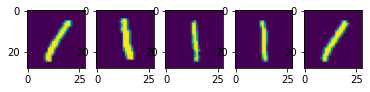

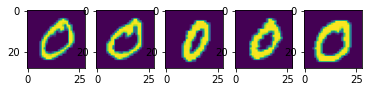

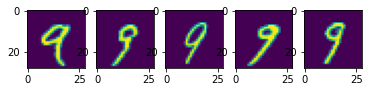

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no9[ii,:,:])
plt.show()

In [ ]:
00000000025500000000000000
00000000025500000000000000
00000000002550000000000000




0000000000255000000000000
0000025500000002550000000
00002550000000000255500000000
00002550000000000255500000000
0000025500000002550000000

In [ ]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [ ]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum9 = np.sum(no9>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
sum1.shape

(6742,)

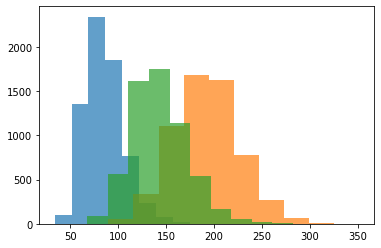

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum9, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

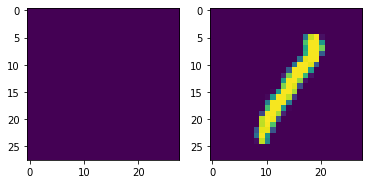

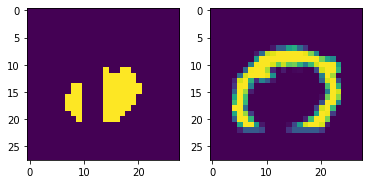

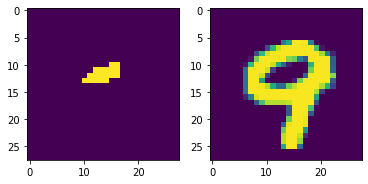

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no9[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

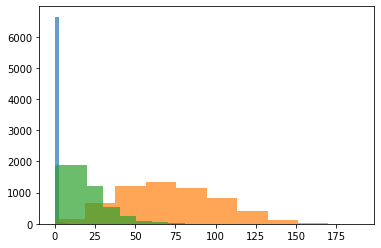

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole9 = np.array([getHolePixels(i).sum() for i in no9])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(hole9, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

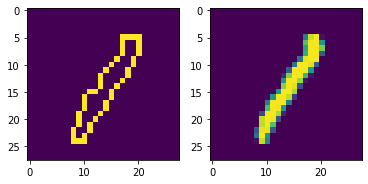

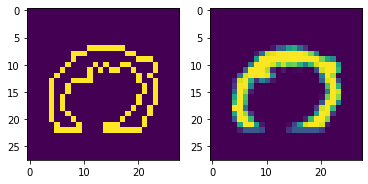

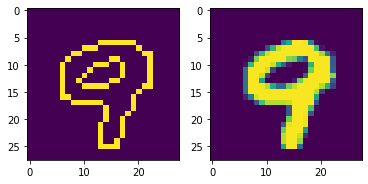

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no9[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

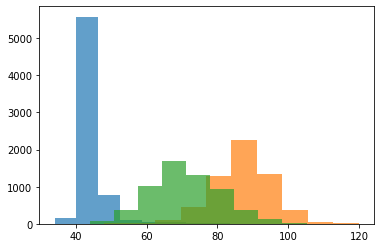

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
bound9 = np.array([getBoundaryPixels(i).sum() for i in no9])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(bound9, alpha=0.7);

What will happen if we plot two features together? 

'If we plot two features together, it helps us to easily distinguish between both the digits as the model will be much more better and can be more distinguished easily.\nThe model will be powerful as it will have power of 2 good features and can be differentiated easily.'

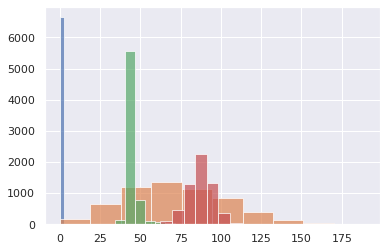

In [ ]:
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
'''If we plot two features together, it helps us to easily distinguish between both the digits as the model will be much more better and can be more distinguished easily.
The model will be powerful as it will have power of 2 good features and can be differentiated easily.'''

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

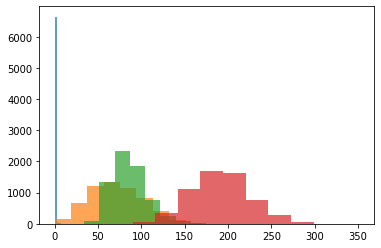

In [ ]:
#1.
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

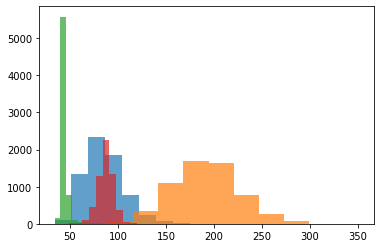

In [ ]:
#1.
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

In [ ]:
'''Ans1. The combination of two or more features which gives the best model which can easily differentiate between given digits is the best combination.
I think bound and holes are better combination of features as there is better distinction compared to sum-hole and sum-bound combination.
 For hole and bound features combination on X-axis:
At 0 - Blue
From 30-55 - Green
From 55-110 - Red
From 0-150 - Yellow
So, it is easier to distinguish easily.'''

'1. The combination of two or more features which gives the best model which can easily differentiate between given digits is the best combination.\nI think bound and holes are better combination of features as there is better distinction compared to sum-hole and sum-bound combination.\n For hole and bound features combination on X-axis:\nAt 0 - Blue\nFrom 30-55 - Green\nFrom 55-110 - Red\nFrom 0-150 - Yellow\nSo, it is easier to distinguish easily.'

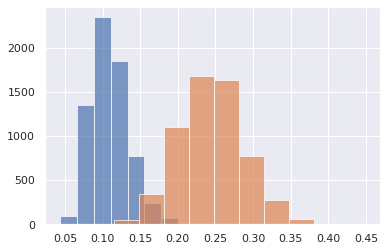

In [ ]:
#Q3.Can you come up with your own features?
#Ans3.Yes, we can make our own complicated features for small data. But, it is better to make complicated models for large data as we cannot predict which feature will work better .
avg1 = np.average(no1>0, (1,2))
avg0 = np.average(no0>0, (1,2)) 
plt.hist(avg1, alpha=0.7);
plt.hist(avg0, alpha=0.7);

'We get histogram for all the features we require. \nIt might help us to easily distinguish between both digits 0 and 1. But sometimes it can also be hard to visualize data if there are large sets of data.\nIf the dataset is small, we can visualize more features together'

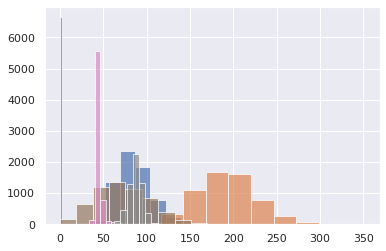

In [ ]:
#2.How would you test or visualize four or more features?
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(avg1, alpha=0.7);
plt.hist(avg0, alpha=0.7);
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
'''We get histogram for all the features we require. 
It might help us to easily distinguish between both digits 0 and 1. But sometimes it can also be hard to visualize data if there are large sets of data.
If the dataset is small, we can visualize more features together'''

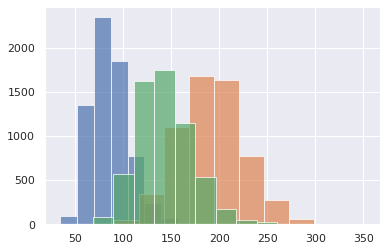

In [ ]:
#Q4.Will these features work for different classes other than 0 and 1?
'''4. Yes, this features will work for different classes than 0 and 1. 
This features work for all the digites from 0 to 9 as I've tried above with 9 and observed the histogram.'''
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum9, alpha=0.7);


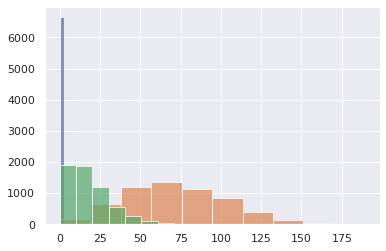

In [ ]:
#Q5.What will happen if we take more that two classes at a time?
#5.If we have take more than 2 classes at the same time, we can observe the histogram for all the classes which you considered.
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(hole9, alpha=0.7);
#We use multiclass classification if we have more than 2 classes at the same time.

## Features from CSV file

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

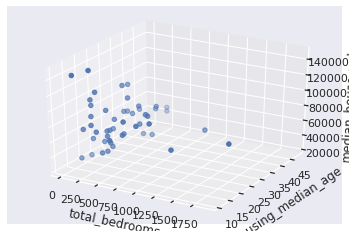

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [ ]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/gdrive/MyDrive/IRIS.csv')

In [ ]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


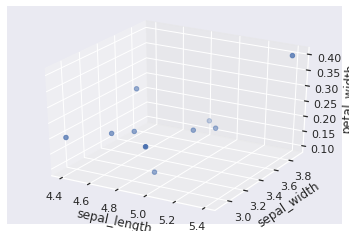

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df1['sepal_length'][:10]
y = df1['sepal_width'][:10]
z = df1['petal_width'][:10]

ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_width")

ax.scatter(x, y, z)

plt.show()

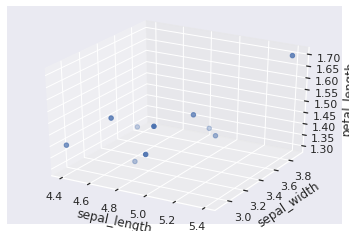

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df1['sepal_length'][:10]
y = df1['sepal_width'][:10]
z = df1['petal_length'][:10]

ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")

ax.scatter(x, y, z)

plt.show()

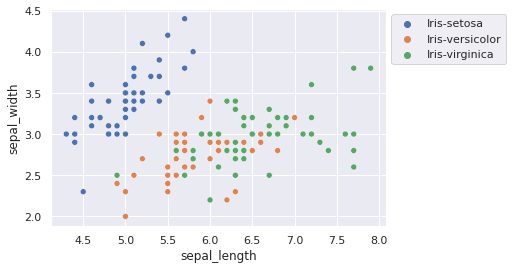

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=df1, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [ ]:
'''Observation:
There are three types of species which are: Species Setosa,Species Setosa and Species Virginica.
As we observe from above plots, Species Setosa has smaller sepal lengths but larger sepal widths,
Versicolor Species lies in the middle of the other two species in terms of sepal length and width,
Species Virginica has larger sepal lengths but smaller sepal widths.'''

'Observation:\nThere are three types of species which are: Species Setosa,Species Setosa and Species Virginica.\nAs we observe from above plots, Species Setosa has smaller sepal lengths but larger sepal widths,\nVersicolor Species lies in the middle of the other two species in terms of sepal length and width,\nSpecies Virginica has larger sepal lengths but smaller sepal widths.'

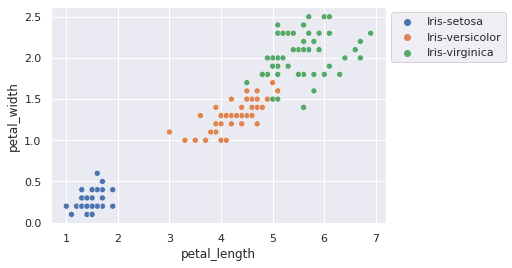

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='petal_length', y='petal_width',
                hue='species', data=df1, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [ ]:
'''Observation
Species Setosa has smaller petal lengths and widths.
Versicolor Species lies in the middle of the other two species in terms of petal length and width
Species Virginica has the largest of petal lengths and widths.'''

'Observation\nSpecies Setosa has smaller petal lengths and widths.\nVersicolor Species lies in the middle of the other two species in terms of petal length and width\nSpecies Virginica has the largest of petal lengths and widths.'

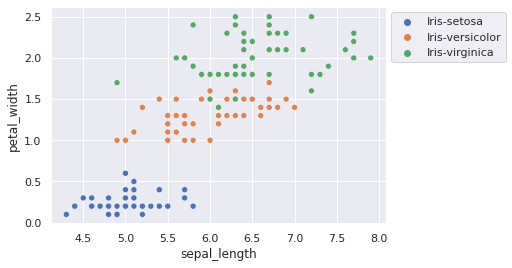

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='sepal_length', y='petal_width',
                hue='species', data=df1, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [ ]:
'''Observation:
As we observe from above plots, Species Setosa has smaller sepal lengths and petal_widths,
Versicolor Species lies in the middle of the other two species in terms of sepal length and petal width,
Species Virginica has larger sepal lengths and petal widths.'''

'Observation:\nAs we observe from above plots, Species Setosa has smaller sepal lengths and petal_widths,\nVersicolor Species lies in the middle of the other two species in terms of sepal length and petal width,\nSpecies Virginica has larger sepal lengths and petal widths.'

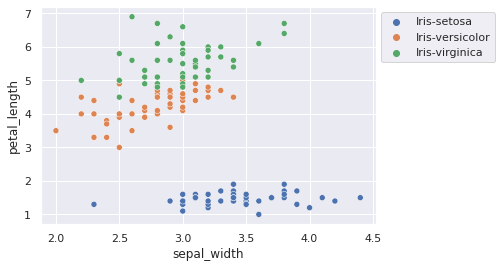

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='sepal_width', y='petal_length',
                hue='species', data=df1, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [ ]:
'''Observation:
As we observe from above plots, Species Setosa has smaller petal lengths and larger sepal widths,
Versicolor Species lies in the middle of the other two species in terms of petal length and sepal width,
Species Virginica has larger petal lengths and medium sepal width.'''

'Observation:\nAs we observe from above plots, Species Setosa has smaller petal lengths and larger sepal widths,\nVersicolor Species lies in the middle of the other two species in terms of petal length and sepal width,\nSpecies Virginica has larger petal lengths and medium sepal width.'

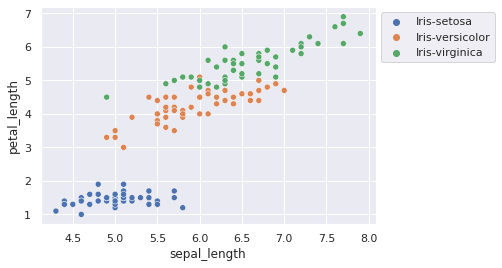

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='sepal_length', y='petal_length',
                hue='species', data=df1, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [ ]:
'''Observation:
As we observe from above plots, Species Setosa has smaller sepal lengths and petal lengths,
Versicolor Species lies in the middle of the other two species in terms of petal length and sepal length,
Species Virginica has larger petal lengths and sepal lengths.'''

'Observation:\nAs we observe from above plots, Species Setosa has smaller sepal lengths and petal lengths,\nVersicolor Species lies in the middle of the other two species in terms of petal length and sepal length,\nSpecies Virginica has larger petal lengths and sepal lengths.'

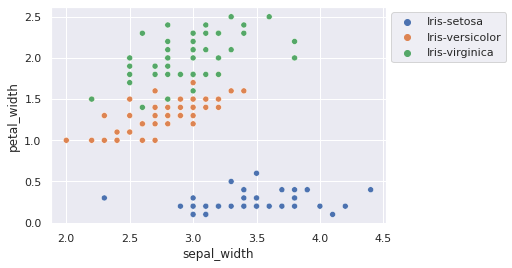

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='sepal_width', y='petal_width',
                hue='species', data=df1, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [ ]:
'''Observation:
As we observe from above plots, Species Setosa has larger sepal widths and smaller petal widths,
Versicolor Species lies in the middle of the other two species in terms of petal width and sepal width,
Species Virginica has larger petal widths and medium sepal lengths.'''

'Observation:\nAs we observe from above plots, Species Setosa has larger sepal widths and smaller petal widths,\nVersicolor Species lies in the middle of the other two species in terms of petal width and sepal width,\nSpecies Virginica has larger petal widths and medium sepal lengths.'

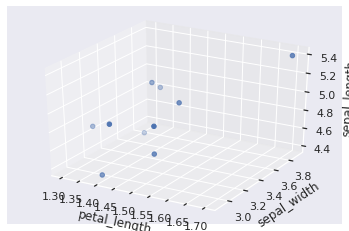

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df1['petal_length'][:10]
y = df1['sepal_width'][:10]
z = df1['sepal_length'][:10]

ax.set_xlabel("petal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("sepal_length")

ax.scatter(x, y, z)

plt.show()

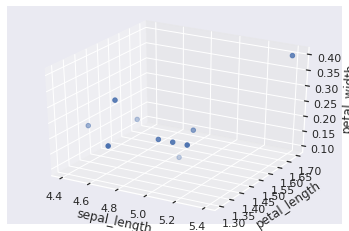

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df1['sepal_length'][:10]
y = df1['petal_length'][:10]
z = df1['petal_width'][:10]

ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")
ax.set_zlabel("petal_width")

ax.scatter(x, y, z)

plt.show()

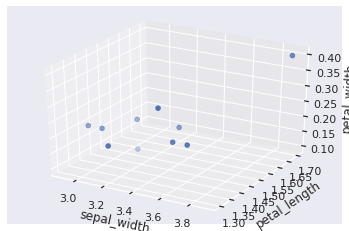

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df1['sepal_width'][:10]
y = df1['petal_length'][:10]
z = df1['petal_width'][:10]

ax.set_xlabel("sepal_width")
ax.set_ylabel("petal_length")
ax.set_zlabel("petal_width")

ax.scatter(x, y, z)

plt.show()

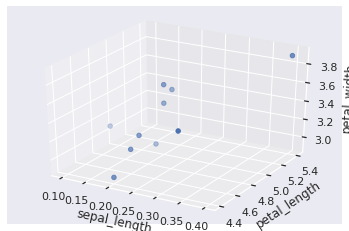

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df1['petal_width'][:10]
y = df1['sepal_length'][:10]
z = df1['sepal_width'][:10]

ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")
ax.set_zlabel("petal_width")

ax.scatter(x, y, z)

plt.show()

In [ ]:
'''Observation:
In Species Setosa:
When the sepal length is decreasing, sepal width is increasing and petal length is decreasing.
When the the sepal length is decreasing and sepal width is increasing, the petal width is also decreasing.
So, the size of sepal width is increasing and the other attributes are decreasing.

In Versicolor Species:
When the sepal length and sepal width are normal and petal length is normal(medium) i.e, no drastic change.
When the the sepal length and sepal width are normal, the petal width is also medium.
So, the size of all attributes are medium.

In Species Virginica:
When the sepal length is increasing and sepal width is decreasing, then the petal length increasing.
When the the sepal length is increasing and sepal width is decreasing, the petal width is also increasing.
So, the size of sepal width is decreasing and the other attributes are increasing.'''

'Observation:\nIn Species Setosa:\nWhen the sepal length is decreasing, sepal width is increasing and petal length is decreasing.\nWhen the the sepal length is decreasing and sepal width is increasing, the petal width is also decreasing.\nSo, the size of sepal width is increasing and the other attributes are decreasing.\n\nIn Versicolor Species:\nWhen the sepal length and sepal width are normal and petal length is normal(medium) i.e, no drastic change.\nWhen the the sepal length and sepal width are normal, the petal width is also medium.\nSo, the size of all attributes are medium.\n\nIn Species Virginica:\nWhen the sepal length is increasing and sepal width is decreasing, then the petal length increasing.\nWhen the the sepal length is increasing and sepal width is decreasing, the petal width is also increasing.\nSo, the size of sepal width is decreasing and the other attributes are increasing.'

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [ ]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


original data size: (60000, 28, 28)


In [ ]:
print(train_X[0].shape,train_y[0])

(28, 28) 5


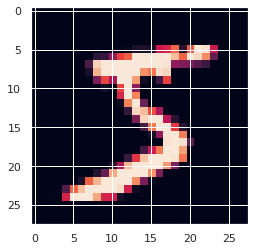

In [ ]:
plt.imshow(train_X[0])

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

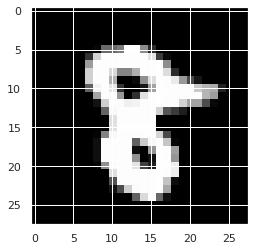

(28, 28)


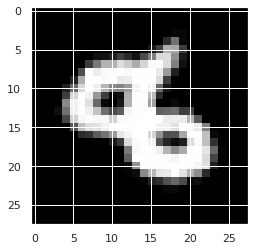

In [ ]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [ ]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

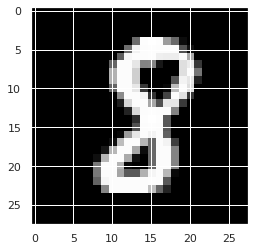

shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.77395605]
angle with constraint is: [19.1769234]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.43887844]
angle with constraint is: [-4.27850922]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.85859792]
angle with constraint is: [25.10185439]


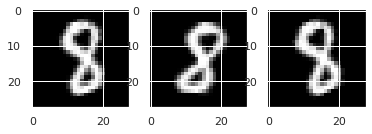

In [ ]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a 
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area. 

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

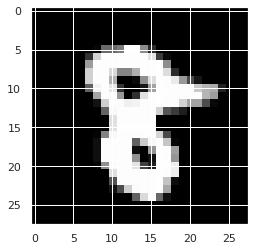

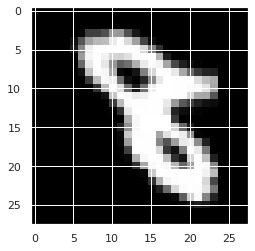

In [ ]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [ ]:
from skimage.morphology import skeletonize


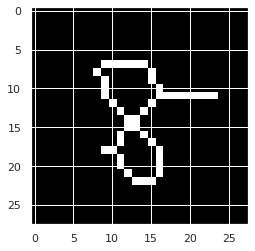

In [ ]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [ ]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [ ]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

count 1


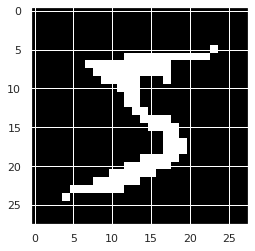

count 2


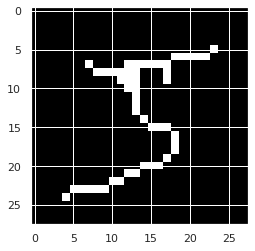

count 3


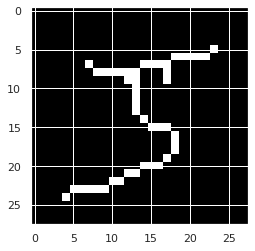

count 4


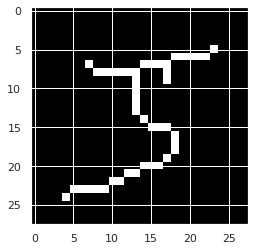

count 5


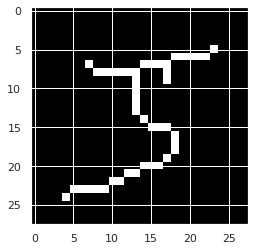

In [ ]:
skeleton_five = Skeletonization(binarized)